In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import h5py
i_x = 0
i_y = 1

In [2]:
def read_C(folder,sample):
    fname = "C"+str(sample).zfill(4)+".h5"
    file = h5py.File(folder+fname,'r')
    C = np.array(file['C'])
    t_t = np.array(file['t_t'])
    t_detmin = np.array(file['t_detmin'])
    t_detmax = np.array(file['t_detmax'])
    t_Cmax = np.array(file['t_Cmax'])
    t = file['C'].attrs['t']
    file.close()
    return C,t,t_t,t_detmin,t_detmax,t_Cmax

In [8]:
folder = "C_2500_fields/"
C,t,t_t,t_detmin,t_detmax,t_Cmax = read_C(folder,sample=90)
N = C.shape[0]+1
L = 2*np.pi
x = np.linspace(-L/2,L/2,N)
y = np.linspace(-L/2,L/2,N)
dx = L/(N-1)
dy = L/(N-1)
dxsqinv = 1/dx**2 
dysqinv = 1/dy**2
x_u = np.copy(x[1:])
y_u = 0.5*(y[1:] + y[:-1])
x_v = 0.5*(x[1:] + x[:-1])
y_v = np.copy(y[1:])
x_p = 0.5*(x[1:] + x[:-1])
y_p = 0.5*(y[1:] + y[:-1])

Xu,Yu = np.meshgrid(y_u,x_u)
Xv,Yv = np.meshgrid(y_v,x_v)
Xp,Yp = np.meshgrid(y_p,x_p)

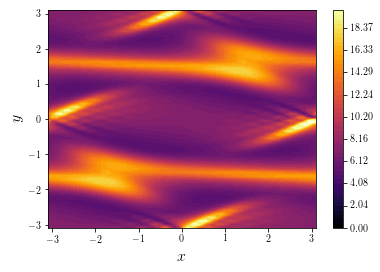

In [13]:
n = 4
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
lev = np.linspace(0,20,50)
plt.contourf(Xp,Yp,(C[:,:,i_x,i_x]+C[:,:,i_y,i_y])/L**2*100,levels = lev,cmap='inferno')
plt.colorbar()
# plt.quiver(Xp[::n,::n],Yp[::n,::n],up[::n,::n],vp[::n,::n],units='xy',scale=2.,color='white')
plt.xlabel(r"$x$", fontdict = font)
plt.ylabel(r"$y$", fontdict = font)
plt.show()

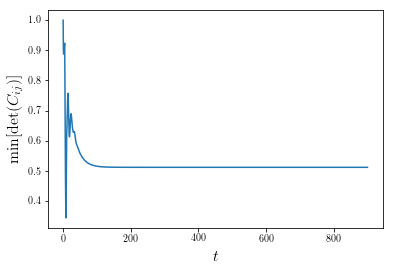

In [14]:
plt.plot(t_t,t_detmin)
plt.xlabel(r"$t$", fontdict = font)
plt.ylabel(r"$\min[\det(C_{ij})]$", fontdict = font)
plt.show()

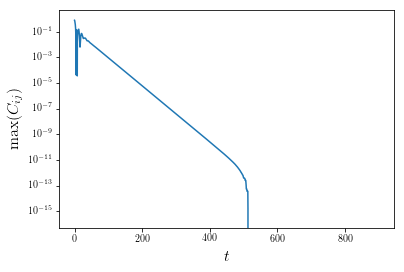

In [17]:
plt.semilogy(t_t,np.abs(t_Cmax[-1]-t_Cmax)/t_Cmax[-1])
plt.xlabel(r"$t$", fontdict = font)
plt.ylabel(r"$\max(C_{ij})$", fontdict = font)
plt.show()